In [8]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

random test
5


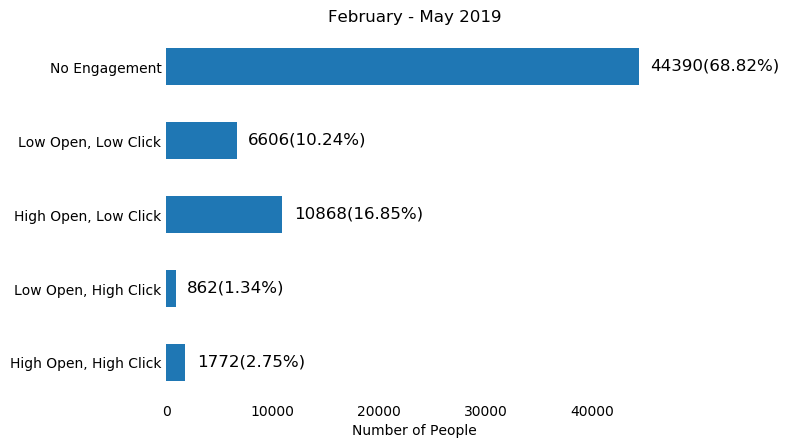

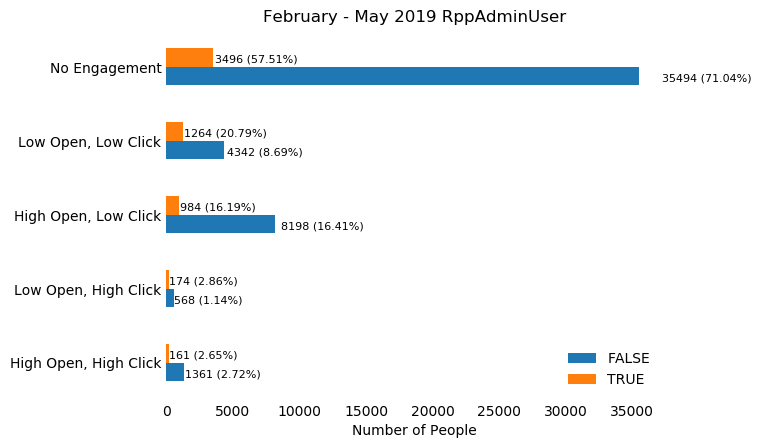

In [9]:
def f(x):
    #doEverything("all67.csv", x)
    return x

def removeZero(var):
    if var[0] == '0':
        return int(var[1])
    else:
        return int(var)

def convertTime(dateStr):
    year = int(dateStr[0:4])
    month = removeZero(dateStr[5:7])
    date = removeZero(dateStr[8:10])
    hour = removeZero(dateStr[11:13])
    minute = removeZero(dateStr[14:16])
    sec = removeZero(dateStr[17:19])
    return datetime.datetime(year, month, date, hour, minute, sec) 


def getLatestInfo(monthData):
    #gets most updated records from monthData
    #can just update values without checking for data because they are stored in chronological order
    latest_dict = {}
    for row in monthData:
        try:
            latest_dict[row[0]] = [row[1], row[2], row[3]]
        except:
            pass
    return latest_dict

def getIndIds(latest_dict):
    #loops through latest_dict and gets individual motiva_contact_ids and how many times they occur
    ind_mcid = {}
    for thing in latest_dict.keys():
        look = thing[1:thing.find(',')]
        if ind_mcid.get(look) == None:
            ind_mcid[look] = 1
        elif ind_mcid.get(look) != None:
            j = ind_mcid.get(look) + 1
            ind_mcid.update({look:j})
    return ind_mcid

def getIndIdsAtt(latest_dict):
    #gets individual ids with their latest dates and attributes
    #right now returning just attributes
    #can later return dates
    ind_mcid_att = {}
    ind_mcid_date = {}
    for key, value in latest_dict.items():
        look = key[1:key.find(',')]
        if ind_mcid_date.get(look) == None:
            ind_mcid_date[look] = value[2]
            ind_mcid_att[look] = value[0]
        elif ind_mcid_date.get(look) != None:
            old_date = ind_mcid_date[look] 
            curr_date = value[2]
            if curr_date > old_date:
                ind_mcid_date.update({look: curr_date})
                ind_mcid_att.update({look: value[0]})
    return ind_mcid_att

def getCatCont(ind_mcid, latest_dict):
    #sets up cat_cont so it has all individual motiva_contact_ids and their engagement - set to 0 right now
    cat_cont = {}
    for el in ind_mcid.keys():
        cat_cont[el] = {'bounceback': 0, 'unsubscribe' : 0, 'send' : 0, 'open' : 0, 'clickthrough' : 0} 
    #fills in cat_cont with all engagement for individual motiva_contact_ids
    #changed, but should still work
    for key, value in latest_dict.items():
        cont_id = key[1:key.find(',')]
        cat_cont[cont_id][value[1]] = cat_cont[cont_id][value[1]]  + 1
    return cat_cont

def getAddDict(ind_mcid, cat_cont):
    #fills in add_dict with total engagement for everyone
    add_dict = Counter({'bounceback': 0, 'unsubscribe' : 0, 'send' : 0, 'open' : 0, 'clickthrough' : 0})
    for cid in ind_mcid.keys():
        A = Counter(cat_cont[cid])
        add_dict = add_dict + A
    return add_dict

def getJustEngaged(cat_cont):
    #sets up just_engaged to only have keys with opens and/or clicks and their engagement
    just_engaged = {}
    for key, value in cat_cont.items():
        if cat_cont[key]['open'] > 0 or cat_cont[key]['clickthrough'] > 0:
            just_engaged[key] = value
    return just_engaged

def getNotEngaged(cat_cont):
    #sets up just_engaged to only have keys with opens and/or clicks and their engagement
    not_engaged = {}
    for key, value in cat_cont.items():
        if cat_cont[key]['open'] == 0 and cat_cont[key]['clickthrough'] == 0:
            not_engaged[key] = value
    return not_engaged

def getAddEDict(just_engaged):
    add_e_dict = Counter({'bounceback': 0, 'unsubscribe' : 0, 'send' : 0, 'open' : 0, 'clickthrough' : 0})    
    #fills in add_e_dict with total engagement for all engaged keys
    for cid in just_engaged.keys():
        A = Counter(just_engaged[cid])
        add_e_dict = add_e_dict + A
    return add_e_dict

def getJEPerMed(just_engaged):
    #sets up just_engagedper so it has all individual motiva_contact_ids and their percentage opens and clicks
    #loops through just_engaged to append percentage of opens and clicks per key 
    #to lists to find the median open and click rate
    ocper_list = []
    cper_list = []
    just_engagedper = {}
    for key, value in just_engaged.items():
        o = value['open']
        c = value['clickthrough']
        t = value['bounceback'] + value['unsubscribe'] + value['send'] + o + c
        ocper_list.append(((o+c)/t) * 100)
        cper_list.append((c/t) * 100)
        just_engagedper[key] = {'open' : (((o+c)/t) * 100) , 'clickthrough' : ((c/t) * 100)}    
    med_open = median(ocper_list)
    med_click = median(cper_list)
    return [just_engagedper, med_open, med_click]
    
def getBuckets(just_engagedper, med_open, med_click):
    #loops through just_engaged to compare open and click rate to the medians and group keys into buckets
    lolc = []
    holc = []
    lohc = []
    hohc = []
    for key, value in just_engagedper.items():
        open_rate = value['open']
        click_rate = value['clickthrough']
        if open_rate < med_open and click_rate <= med_click:
            lolc.append(key)
        elif open_rate >= med_open and click_rate <= med_click:
            holc.append(key)
        elif open_rate < med_open and click_rate > med_click:
            lohc.append(key)
        elif open_rate >= med_open and click_rate > med_click:
            hohc.append(key)
        else:
            print(key)
            print(value)
            print(open_rate)
            print(click_rate)
    return [lolc, holc, lohc, hohc]

def getAddEPerDict(add_e_dict):
    o = add_e_dict['open']
    c = add_e_dict['clickthrough']
    t = add_e_dict['bounceback'] + add_e_dict['unsubscribe'] + add_e_dict['send'] + o + c
    t_add_e_dict = {'open': (((o+c)/t) * 100), 'clickthrough': ((c/t)*100)}
    return t_add_e_dict

def getAddEPerNCDict(add_e_dict):
    o = add_e_dict['open']
    c = add_e_dict['clickthrough']
    t = add_e_dict['bounceback'] + add_e_dict['unsubscribe'] + add_e_dict['send'] + o + c
    t_add_e_dict = {'open': ((o/t) * 100), 'clickthrough': ((c/t)*100)}
    return t_add_e_dict
    


def graphFunnel(num_no_engagement, buckets, title):
    levels = (len(buckets[3]), len(buckets[2]), len(buckets[1]), len(buckets[0]), num_no_engagement)
    index = ['High Open, High Click', 'Low Open, High Click', 'High Open, Low Click', 'Low Open, Low Click', 'No Engagement']
    #plt.style.use('ggplot')    
    df = pd.DataFrame({'Funnel Stages' : levels}, index=index)
    ax = df.plot.barh(rot=0)
    ax.set_xlabel("Number of People")    
    ax.set_title(title)
    ax.get_legend().remove()
    ax.set_frame_on(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    #plt.legend(frameon=False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # get_width pulls left or right; get_y pushes up or down
    for i in ax.patches:
        ax.text(i.get_width() + 1100, i.get_y() + 0.2, str(i.get_width()) + "(" + 
                str(round((i.get_width()/total)*100, 2)) + "%)", fontsize=12,color='black')
    
def amt(month, act):
    if act not in month:
        return 0
    return month[act]
        

#really, using totals
def graphOverTime(May2019, April2019, March2019, Feb2019, y):
    one = (amt(Feb2019,'open'), amt(March2019, 'open'), amt(April2019, 'open'), amt(May2019, 'open'))
    two = (amt(Feb2019,'clickthrough'), amt(March2019, 'clickthrough'), amt(April2019, 'clickthrough'), amt(May2019, 'clickthrough'))
    index = ['Feb 2019', 'March 2019', 'April 2019', 'May 2019']
    df = pd.DataFrame({'Opens' : one, 'Clicks' : two}, index=index)
    ax = df.plot.bar(rot=0, stacked = True)
    ax.set_xlabel("Months")
    ax.set_ylabel(y)    
    ax.set_title("Engagement Over Time")
    ax.get_legend().remove()
    
def getRppAdminUser(strr, m, att):
    j = 0
    try:
        x = json.loads(strr)
        if att in x:
            country = (x[att]).upper()
            if m.get(country) == None:
                m[country] = 1
            elif m.get(country) != None:
                j = m.get(country) + 1
                m.update({country: j})            
    except:
        pass
    return m

def getEngDict(att, ind_mcid_att, not_engaged, lolc, holc, lohc, hohc):
    ne_rpp_dict = {}
    lolc_rpp_dict = {}
    holc_rpp_dict = {}
    lohc_rpp_dict = {}
    hohc_rpp_dict = {}
    everything_dict = {}
    for key, value in ind_mcid_att.items():
        if not_engaged.get(key) != None:
            strr = ''.join(value)
            ne_rpp_dict = getRppAdminUser(strr, ne_rpp_dict, att)
        elif key in lolc:
            strr = ''.join(value)
            lolc_rpp_dict = getRppAdminUser(strr, lolc_rpp_dict, att)
        elif key in holc:
            strr = ''.join(value)
            holc_rpp_dict = getRppAdminUser(strr, holc_rpp_dict, att)
        elif key in lohc:
            strr = ''.join(value)
            lohc_rpp_dict = getRppAdminUser(strr, lohc_rpp_dict, att)
        elif key in hohc:
            strr = ''.join(value)
            hohc_rpp_dict = getRppAdminUser(strr, hohc_rpp_dict, att)
        else:
            print(key)
    all_tg = [ne_rpp_dict, lolc_rpp_dict, holc_rpp_dict, lohc_rpp_dict, hohc_rpp_dict]
    return all_tg 

def addAllDict(b_rpp_dict, u_rpp_dict, s_rpp_dict, o_rpp_dict, c_rpp_dict):
    A = Counter(b_rpp_dict)
    B = Counter(u_rpp_dict)
    C = Counter(s_rpp_dict)
    D = Counter(o_rpp_dict)
    E = Counter(c_rpp_dict)
    return A + B + C + D + E

def per(num, total):
    return round((num/total) * 100, 2)


#FIGURE OUT HOW TO DO PERCENTAGES
def graphAtt(att, rsa, ne_rpp_dict, lolc_rpp_dict, holc_rpp_dict, lohc_rpp_dict, hohc_rpp_dict, title):
    one = (amt(hohc_rpp_dict, rsa[0][0]), amt(lohc_rpp_dict, rsa[0][0]), amt(holc_rpp_dict, rsa[0][0]), 
           amt(lolc_rpp_dict, rsa[0][0]), amt(ne_rpp_dict, rsa[0][0]))
    two = (amt(hohc_rpp_dict, rsa[1][0]), amt(lohc_rpp_dict, rsa[1][0]), amt(holc_rpp_dict, rsa[1][0]), 
           amt(lolc_rpp_dict, rsa[1][0]), amt(ne_rpp_dict, rsa[1][0]))
    one_list = [amt(hohc_rpp_dict, rsa[0][0]), amt(lohc_rpp_dict, rsa[0][0]), amt(holc_rpp_dict, rsa[0][0]), 
           amt(lolc_rpp_dict, rsa[0][0]), amt(ne_rpp_dict, rsa[0][0])]
    two_list = [amt(hohc_rpp_dict, rsa[1][0]), amt(lohc_rpp_dict, rsa[1][0]), amt(holc_rpp_dict, rsa[1][0]), 
           amt(lolc_rpp_dict, rsa[1][0]), amt(ne_rpp_dict, rsa[1][0])]
    total_one = sum(one_list)
    total_two = sum(two_list)
    percentages = [per(amt(hohc_rpp_dict, rsa[0][0]), total_one), per(amt(lohc_rpp_dict, rsa[0][0]), total_one), 
                  per(amt(holc_rpp_dict, rsa[0][0]), total_one), per(amt(lolc_rpp_dict, rsa[0][0]), total_one), 
                  per(amt(ne_rpp_dict, rsa[0][0]), total_one), per(amt(hohc_rpp_dict, rsa[1][0]), total_two), 
                   per(amt(lohc_rpp_dict, rsa[1][0]), total_two), per(amt(holc_rpp_dict, rsa[1][0]), total_two), 
                   per(amt(lolc_rpp_dict, rsa[1][0]), total_two), per(amt(ne_rpp_dict, rsa[1][0]), total_two)]
    try:
        three = (amt(hohc_rpp_dict, rsa[2][0]), amt(lohc_rpp_dict, rsa[2][0]), amt(holc_rpp_dict, rsa[2][0]), 
                 amt(lolc_rpp_dict, rsa[2][0]), amt(ne_rpp_dict, rsa[2][0]))
        three_list = [amt(hohc_rpp_dict, rsa[2][0]), amt(lohc_rpp_dict, rsa[2][0]), amt(holc_rpp_dict, rsa[2][0]), 
                 amt(lolc_rpp_dict, rsa[2][0]), amt(ne_rpp_dict, rsa[2][0])]
        total_three = sum(three_list)
        percentages = [per(amt(hohc_rpp_dict, rsa[0][0]), total_one), per(amt(lohc_rpp_dict, rsa[0][0]), total_one), 
                  per(amt(holc_rpp_dict, rsa[0][0]), total_one), per(amt(lolc_rpp_dict, rsa[0][0]), total_one), 
                  per(amt(ne_rpp_dict, rsa[0][0]), total_one), per(amt(hohc_rpp_dict, rsa[1][0]), total_two), 
                   per(amt(lohc_rpp_dict, rsa[1][0]), total_two), per(amt(holc_rpp_dict, rsa[1][0]), total_two), 
                   per(amt(lolc_rpp_dict, rsa[1][0]), total_two), per(amt(ne_rpp_dict, rsa[1][0]), total_two), 
                      per(amt(hohc_rpp_dict, rsa[2][0]), total_three), per(amt(lohc_rpp_dict, rsa[2][0]), total_three), 
                  per(amt(holc_rpp_dict, rsa[2][0]), total_three), per(amt(lolc_rpp_dict, rsa[2][0]), total_three), 
                  per(amt(ne_rpp_dict, rsa[2][0]), total_three)]
    except:
        pass

    index = ['High Open, High Click', 'Low Open, High Click', 'High Open, Low Click', 'Low Open, Low Click', 'No Engagement']

    try:
        df = pd.DataFrame({rsa[0][0] : one, rsa[1][0] : two, rsa[2][0] : three}, index=index)
    except:
        df = pd.DataFrame({rsa[0][0] : one, rsa[1][0] : two}, index=index)
    ax = df.plot.barh(rot=0)
    ax.set_xlabel("Number of People")
    ax.set_title(title+ " " + att)
    ax.set_frame_on(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.get_legend().set_bbox_to_anchor((0.5, -0.12))
    plt.legend(frameon=False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    x = 0
    for i in ax.patches:
        ax.text(i.get_width() + (0.05 * i.get_width()), i.get_y() + 0.06, str(i.get_width()) + " (" + str(percentages[x]) +
                "%)", fontsize=8,color='black')
        x = x + 1
    

    
def doEverythingFunnel(May2019Data, title):
    latest_May2019 = getLatestInfo(May2019Data)
    ind_mcid_May2019 = getIndIds(latest_May2019)
    ind_mcid_att_May2019 = getIndIdsAtt(latest_May2019)
    cat_cont_May2019 = getCatCont(ind_mcid_May2019,latest_May2019)
    add_dict_May2019 = getAddDict(ind_mcid_May2019, cat_cont_May2019)
    just_engaged_May2019 = getJustEngaged(cat_cont_May2019)
    not_engaged_May2019 = getNotEngaged(cat_cont_May2019)
    add_e_dict_May2019 = getAddEDict(just_engaged_May2019)
    add_e_per_dict_May2019 = getAddEPerDict(add_e_dict_May2019)
    add_e_perNC_dict_May2019 = getAddEPerNCDict(add_e_dict_May2019)
    pmMay2019 = getJEPerMed(just_engaged_May2019)
    just_engagedper_May2019 = pmMay2019[0]
    med_open_May2019 = pmMay2019[1]
    med_click_May2019 = pmMay2019[2]
    bucketsMay2019 = getBuckets(just_engagedper_May2019, med_open_May2019, med_click_May2019)
    num_no_engagementMay2019 = len(ind_mcid_May2019) - len(just_engaged_May2019)
    graphFunnel(num_no_engagementMay2019, bucketsMay2019, title)
    #pp.savefig(bbox_inches="tight")
    return [add_e_dict_May2019, add_e_perNC_dict_May2019, ind_mcid_att_May2019, not_engaged_May2019, bucketsMay2019]


def doEverythingAtt(month, att):
    bucketsMonth = month[4]
    all_tg = getEngDict(att, month[2], month[3], bucketsMonth[0], bucketsMonth[1], bucketsMonth[2], bucketsMonth[3])
    ne_rpp_dict = all_tg[0]
    lolc_rpp_dict = all_tg[1]
    holc_rpp_dict = all_tg[2]
    lohc_rpp_dict = all_tg[3]
    hohc_rpp_dict = all_tg[4]
    added_dict = addAllDict(ne_rpp_dict, lolc_rpp_dict, holc_rpp_dict, lohc_rpp_dict, hohc_rpp_dict)
    sorted_added_dict = sorted(added_dict.items(), key=operator.itemgetter(1))
    rsa = sorted_added_dict[::-1]
    title = "February - May 2019"
    graphAtt(att, rsa, ne_rpp_dict, lolc_rpp_dict, holc_rpp_dict, lohc_rpp_dict, hohc_rpp_dict, title)
        #pp.savefig(bbox_inches="tight")
        
def doEverything(docName, att):
    f = open(docName)
    data = csv.reader(f)
    April2019Data = []
    May2019Data = []
    March2019Data = []
    Feb2019Data = []
    Jan2019Data = []
    Dec2018Data = []
    MAM2019Data = []

    for row in data:
        try:
            dateConv = convertTime(row[3])
            if (dateConv.month == 4 or dateConv.month == 3 or dateConv.month == 5 or dateConv.month == 2) and dateConv.year == 2019:
                MAM2019Data.append(row)
        except:
            pass
    
    MAMDicts = doEverythingFunnel(MAM2019Data, "February - May 2019")
    print(len(MAMDicts))


    all_att = ['RppAdminUser', 'Industry', 'AccountSubGroup', 'Status', 'StateOrProvince', 'RppStatus', 
               'CreatedByModule', 'FavouriteContact', 'JobTitleCode', 'Salutation', 'DepartmentCode', 
               'ZzzObsoleteDoNotUseUpdateIndustry']

    #all_att = ['Industry', 'Company', 'RppUser', 'StateOrProvince', 'City', 'PostcodeStockH', 'JobFunction']


    # #getEngDict(att, ind_mcid_att, not_engaged, lolc, holc, lohc, hohc)
    # #return [lolc, holc, lohc, hohc]

    # all_att = ['RppAdminUser', 'Industry']


    doEverythingAtt(MAMDicts, att)
    
    
    
#comparison with add_dict
import csv
import json
import datetime
from collections import Counter
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.rcParams.update({'figure.max_open_warning': 0})
import operator
import seaborn as sns
from numpy import median
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np
# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages('all_months_collapsed_att.pdf')


print('random test')

doEverything("all67.csv", 'RppAdminUser')







#pp.close()




In [10]:
interact(f, x=['RppAdminUser', 'Industry', 'AccountSubGroup', 'Status',
           'StateOrProvince', 'RppStatus', 'CreatedByModule', 'FavouriteContact', 
           'JobTitleCode', 'Salutation', 'DepartmentCode', 'ZzzObsoleteDoNotUseUpdateIndustry']);

interactive(children=(Dropdown(description='x', options=('RppAdminUser', 'Industry', 'AccountSubGroup', 'Statu…